In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Setup dataframes using csv files
mouse_metadata = pd.read_csv("In/Mouse_metadata.csv")
study_results = pd.read_csv("In/Study_results.csv")

In [3]:
# Merge these into master dataframe
master_df_full = pd.merge(mouse_metadata, study_results, on=("Mouse ID"))

# Preview this new dataframe to check for correctness
master_df_full.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Count the number of unique mice
len(master_df_full["Mouse ID"].unique())

249

In [5]:
# Check for any mice that have duplicate data
mouse_counts = master_df_full.value_counts(subset=["Mouse ID"])
##### Come back to this
master_df = master_df_full.loc[master_df_full["Mouse ID"] != "g989",:]
len(master_df["Mouse ID"].unique())

248

In [6]:
# Group by drug regimen for summary statistics
grouped_df = master_df.groupby(master_df["Drug Regimen"])

# Calculate the summary stastic values using this grouped dataframe
vol_mean = grouped_df["Tumor Volume (mm3)"].mean()
vol_median = grouped_df["Tumor Volume (mm3)"].median()
vol_variance = grouped_df["Tumor Volume (mm3)"].var()
vol_stdev = grouped_df["Tumor Volume (mm3)"].std()
sample = master_df.sample(100)
sample_grp = sample.groupby(sample["Drug Regimen"])

######### COME BACK AND ADD SEM

# Generate a new dataframe using these statistics
summary_df = pd.DataFrame({"Mean Tumor Volume":vol_mean, "Median Tumor Volume":vol_median, "Tumor Volume Variance":vol_variance,\
                           "Tumor Volume St. Dev.":vol_stdev})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


<AxesSubplot:title={'center':'Number of Total Timepoints per Drug'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

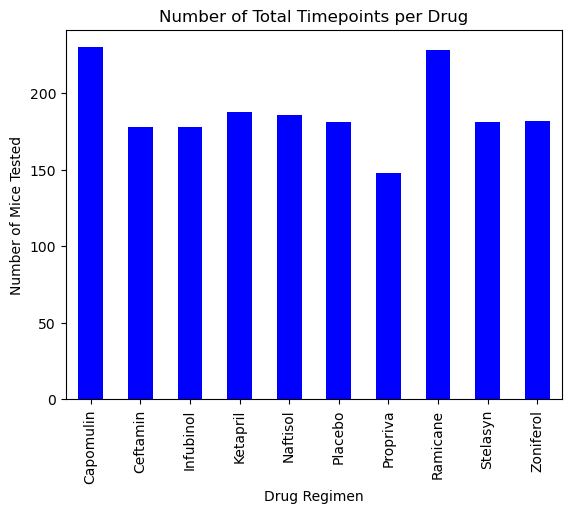

In [7]:
# Create a bar chart using pandas
mouse_nums = grouped_df["Mouse ID"].count()
mouse_nums.plot.bar(color="blue", title="Number of Total Timepoints per Drug", ylabel="Number of Mice Tested")

<BarContainer object of 10 artists>

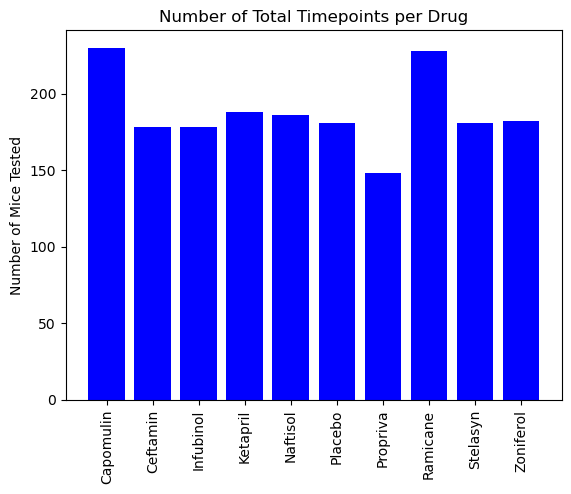

In [8]:
# Create a bar chart using matplotlib
mouse_nums_val = mouse_nums.values
plt.xticks(rotation="vertical")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Total Timepoints per Drug")
plt.bar(sorted(master_df["Drug Regimen"].unique()), mouse_nums_val, color="blue")


<AxesSubplot:ylabel='Sex'>

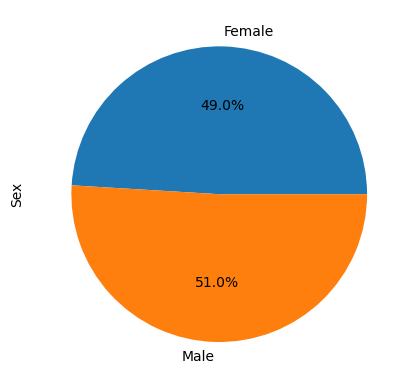

In [9]:
# Create a pie chart using pandas
sex_grp = master_df.groupby(master_df["Sex"])
pie_df = sex_grp["Sex"].count()
pie_df.plot.pie(autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7fd771bcad30>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0')])

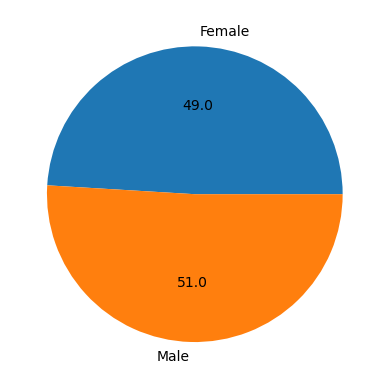

In [10]:
# Create a pie chart using matplotlib
labels = ["Female", "Male"]
values=pie_df.values
plt.pie(values, labels=labels, autopct='%.1f')

In [30]:
# Create a smaller dataframe with only the relevant drug regimen and calculate quartile information

# Capomulin calculations:
cap_df = master_df.loc[(master_df["Drug Regimen"]=="Capomulin")]
cap_last = cap_df.groupby(by=["Mouse ID"]).max("Timepoint")
cap_quartiles = cap_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[.25]
cap_upperq = cap_quartiles[.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# Ramicane calculations:
ram_df = master_df.loc[(master_df["Drug Regimen"]=="Ramicane")]
ram_last = ram_df.groupby(by=["Mouse ID"]).max("Timepoint")
ram_quartiles = ram_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[.25]
ram_upperq = ram_quartiles[.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

# Infubinol calculations:
inf_df = master_df.loc[(master_df["Drug Regimen"]=="Infubinol")]
inf_last = inf_df.groupby(by=["Mouse ID"]).max("Timepoint")
inf_quartiles = inf_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[.25]
inf_upperq = inf_quartiles[.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

# Ceftamin calculations:
cef_df = master_df.loc[(master_df["Drug Regimen"]=="Ceftamin")]
cef_last = cef_df.groupby(by=["Mouse ID"]).max("Timepoint")
cef_quartiles = cef_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[.25]
cef_upperq = cef_quartiles[.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

# Print the outliers
print(f"For Capomulin, values below {cap_lower_bound} or above {cap_upper_bound} could be outliers.")
print(f"For Ramicane, values below {ram_lower_bound} or above {ram_upper_bound} could be outliers.")
print(f"For Infubinol, values below {inf_lower_bound} or above {inf_upper_bound} could be outliers.")
print(f"For Ceftamin, values below {cef_lower_bound} or above {cef_upper_bound} could be outliers.")

For Capomulin, values below 42.376491720000004 or above 49.37251379999999 could be outliers.
For Ramicane, values below 42.984251445 or above 48.359580925 could be outliers.
For Infubinol, values below 36.83290494999999 or above 82.74144559000001 could be outliers.
For Ceftamin, values below 25.355449580000002 or above 87.66645829999999 could be outliers.


[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

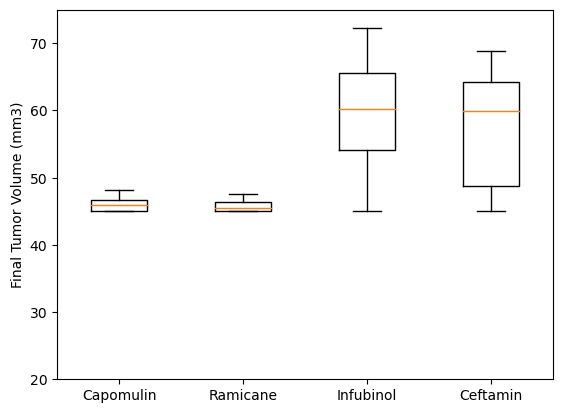

In [37]:
# Create boxplot
new_dict = {'Capomulin':cap_last["Tumor Volume (mm3)"].values,'Ramicane':ram_last["Tumor Volume (mm3)"].values,\
            'Infubinol':inf_last["Tumor Volume (mm3)"].values,'Ceftamin':cef_last["Tumor Volume (mm3)"].values}
fig, ax = plt.subplots()
ax.boxplot(new_dict.values())
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_ylim(20,75)
ax.set_xticklabels(new_dict.keys())

<AxesSubplot:title={'center':'Capomulin Treatment for Mouse s185'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

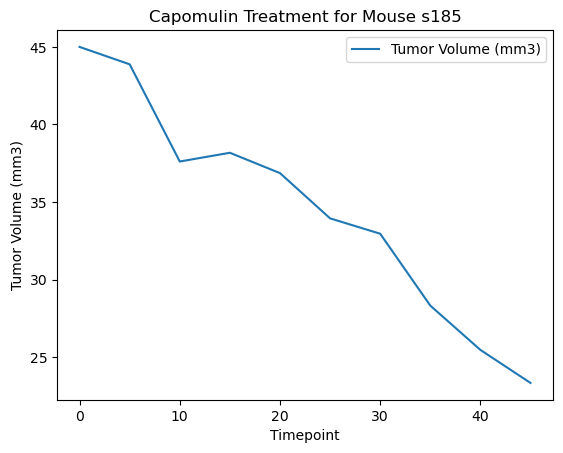

In [23]:
# Create lineplot for sample mouse
cap_df = master_df.loc[master_df["Drug Regimen"] =="Capomulin",:]
sample_mouse_id = cap_df.iloc[0,0]
sample_mouse_df = cap_df.loc[cap_df["Mouse ID"]==sample_mouse_id,:]
sample_mouse_df.plot(x="Timepoint", y="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3)", title=f'Capomulin Treatment for Mouse {sample_mouse_id}')

In [ ]:
# Create scatterplot of Capomulin
mouse_grp = cap_df.groupby("Mouse ID")
avg = cap_df.groupby(by=["Mouse ID"]).mean()
avg.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", title="Mouse Body Weight and Average Tumor Size", ylabel="Average Tumor Volume", xlabel="Body Weight(g)")

In [ ]:
# Calculate the correlation coefficient
correlation = st.pearsonr(avg["Weight (g)"].values, avg["Tumor Volume (mm3)"].values)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

In [ ]:
# Add the linear regression line to the above scatterplot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg["Weight (g)"].values, avg["Tumor Volume (mm3)"].values)
regress_values = avg["Weight (g)"].values * slope + intercept
plt.title("Mouse Body Weight and Average Tumor Size")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Body Weight (g)")
plt.scatter(avg["Weight (g)"].values, avg["Tumor Volume (mm3)"].values)
plt.plot(avg["Weight (g)"].values, regress_values,"red")